# Plot figures

### Import libraries 

In [9]:
# libraries
from tifffile import TiffFile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from thunder import Colorize
import seaborn as sns
import fit
import cv2
from scipy.optimize import curve_fit
from copy import copy
from skimage.morphology import erosion
from skimage.morphology import disk
import os
from scipy.ndimage.filters import median_filter
from smooth import smooth
from tifffile import imsave
from PIL import Image

filesep = os.path.sep
image = Colorize.image
%matplotlib inline

In [10]:
# Load trace
# Get excel file as pandas
import pandas as pd
fps = 20
Data = pd.io.excel.read_excel('/Users/seetha/Desktop/Bleach_Correction/SPIM analysis.xlsx', sheetname=0)
columnname = list(Data.columns.values)
columnname_used = columnname[1]
Data.head()

,time,fig4b,fig4c,fig4d,fig4e
0,0.00,11660,12766,10412,10076
1,0.02,11322,12384,10150,9434
2,0.04,11128,11694,10008,9406
3,0.06,11372,11750,10460,9406
4,0.08,11208,11864,10146,8890


In [11]:
# Get excel file as pandas
Data1 = pd.io.excel.read_excel('/Users/seetha/Desktop/Bleach_Correction/SPIM analysis.xlsx', sheetname=1)
columnname = list(Data1.columns.values)
columnname_used = columnname[1]
x1 = Data1['time'].as_matrix()
y1 = Data1[columnname_used].as_matrix()
Data1.head()

,time,Fig. 4f
0,0.00,6576
1,0.02,6514
2,0.04,6478
3,0.06,6402
4,0.08,6438


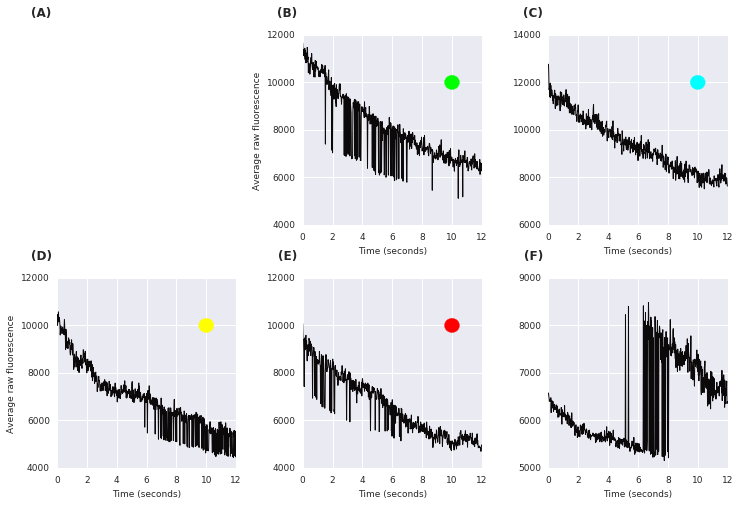

In [13]:
## Figure 4
import plotsettings
import matplotlib.patches as mpatches

publishable = plotsettings.Set('Cell')
publishable.set_figsize(3, 3, aspect_ratio = 1)

fig1 = plt.figure()
fig1.subplots_adjust(hspace=3)
x = Data['time'].as_matrix()

color_mat = ['#00FF00','cyan','#FFFF00','r']
with sns.axes_style('darkgrid'):
    
    ax2 = fig1.add_subplot(3,3,1)
    ax2.axis('off')
    
    for ii in xrange(2,6):
        ax2 = fig1.add_subplot(3,3,ii)
        columnname = list(Data.columns.values)
        columnname_used = columnname[ii-1]
        y = Data[columnname_used].as_matrix()
        y = y[~np.isnan(y)]
        ax2.plot(x, y, color='#0C090A', label='raw trace', linewidth=1)
        if ii == 2 or ii == 4 or ii == 5:      
            art = mpatches.Ellipse([10,10000], 1, 600, color = color_mat[ii-2])
            ax2.add_patch(art)
        elif ii == 3:
            art = mpatches.Ellipse([10,12000], 1, 600, color = color_mat[ii-2])
            ax2.add_patch(art)
            
        plt.xlabel('Time (seconds)')
        
        if ii == 2 or ii == 4:
            plt.ylabel('Average raw fluorescence')
        ax2.locator_params(axis='y', nbins=4)
        
    
    ax2 = fig1.add_subplot(3,3,6)
    ax2.plot(x1, y1, color='#0C090A', label='raw trace', linewidth=1)
    plt.xlabel('Time (seconds)')
    ax2.locator_params(axis='y', nbins=4)    

    publishable.panel_labels(fig = fig1, position = 'outside', case = 'upper',
                             prefix = '(', suffix = ')', fontweight = 'bold', fontsize=12)
    
plt.tight_layout()
plt.show()


Working_Directory = '/Users/seetha/Desktop/Bleach_Correction/'
Save_Directory = os.path.join(Working_Directory, 'Traces_bleach_correction')
if not os.path.exists(Save_Directory):
    os.makedirs(Save_Directory)
fig1.savefig(Save_Directory+filesep+'Figure4.pdf', bbox_inches='tight')